   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

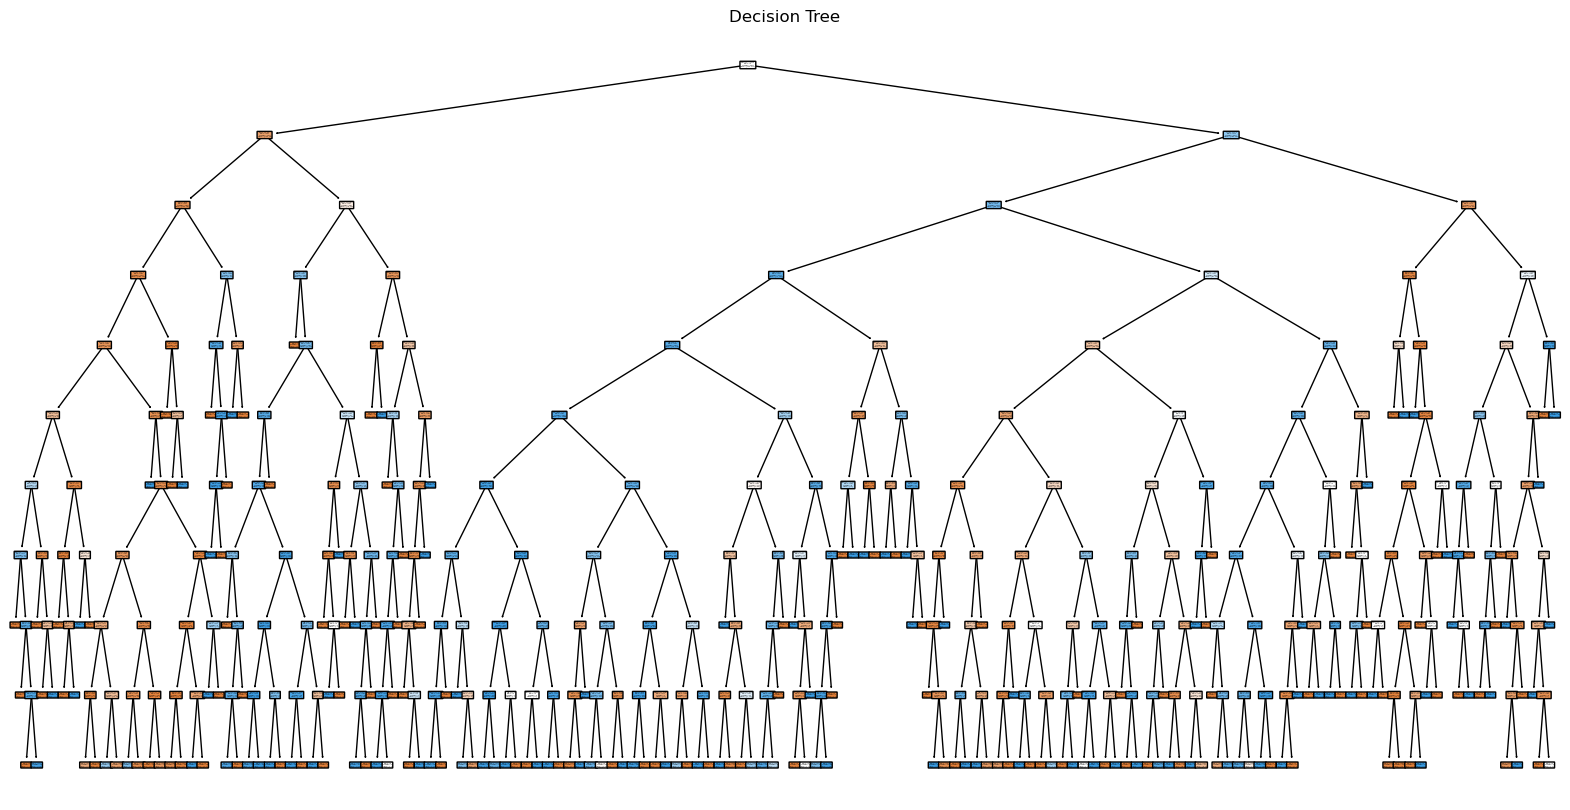

Feature Importances:
duration     0.408069
contact      0.130094
pdays        0.114611
balance      0.075013
age          0.060609
housing      0.055005
month        0.034296
day          0.033663
job          0.022643
loan         0.020441
marital      0.012173
poutcome     0.010490
education    0.010257
campaign     0.008845
previous     0.002843
default      0.000948
dtype: float64


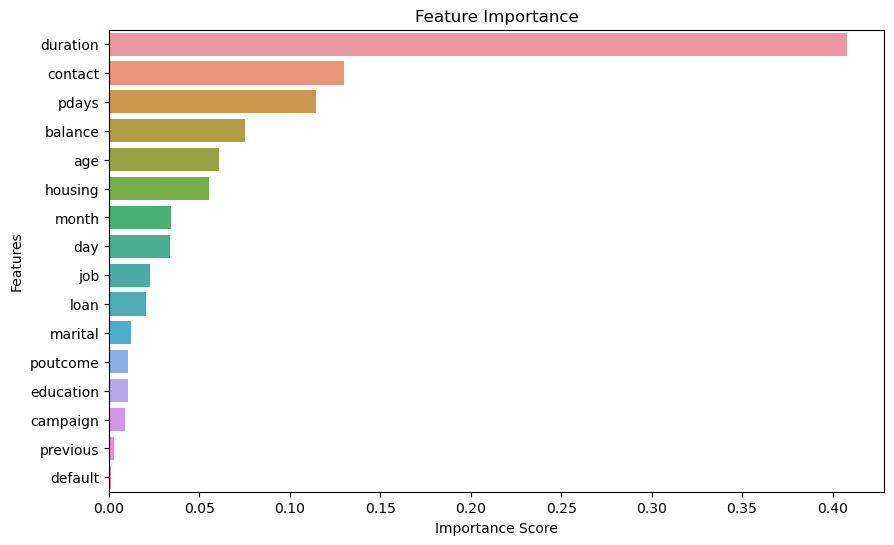

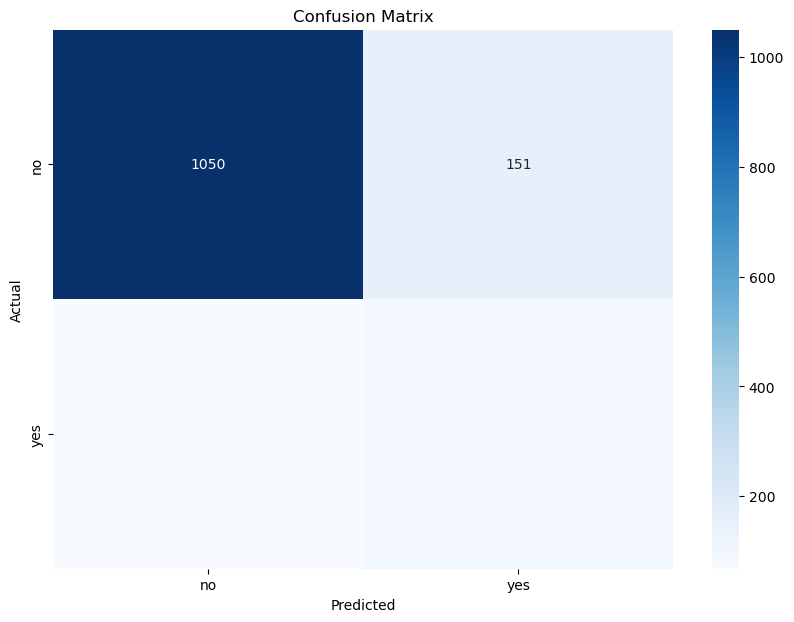

In [9]:
import pandas as pd

# Load the dataset with semicolon as the delimiter
df = pd.read_csv('C:\\Users\\Ubaid-khan\\Desktop\\Internship\\bank.csv', sep=';')
print(df.head())

# Check for missing values
print(df.isnull().sum())

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with semicolon as the delimiter
df = pd.read_csv('C:\\Users\\Ubaid-khan\\Desktop\\Internship\\bank.csv', sep=';')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='f1_macro')

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_clf = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

# Feature importance
feature_importance = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['y'].classes_, yticklabels=label_encoders['y'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
